# Workflow & Hyperparameter Optimization

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

🏠 Import the house price data set. We will keep only numerical features for the sake of simplicity

🎯 Your goal will be to fit the best KNN Regressor. In particular, how many "neighbors" (<font color=blue>K</font> in <font color=blue>K</font>NN) should you consider to get the best predictions for your house prices ?

In [2]:
# Load raw data
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv', index_col="Id")

# Only keep numerical columns and raws without NaN
data = data.select_dtypes(include=np.number).dropna()

data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [3]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

## 1. Train/Test split

❓ **Question (Holdout)**❓

👇 Split the dataset to create your `X_train` `X_test` and `y_train` `y_test`. Use:
- `test_size=0.3`
- `random_state=0` to compare your results with your buddy

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)


## 2. Scaling

⚖️ Scaling is always crucially important for the KNN algorithm..

❓ **Question (Scaling)** ❓ 

* Scale your train set and test set.
* Here, let's simply apply the `StandardScaler` and not waste time choosing one scaler per feature. Indeed, the goals of this exercise are to:
    * review KNN
    * understand GridSearchCV
    * understand RandomizedSearchCV

In [5]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit on the training data and transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 3. Baseline KNN model

❓ **Question (A baseline for our KNN)** ❓

Cross-validate (*cv = 5*) a simple KNN regressor taking into account only _the closest neighbor_, and compute the average score over the 5 folds.

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the model with 1 neighbor
knn = KNeighborsRegressor(n_neighbors=1)

# Cross-validate
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)

# Print average score
cv_scores.mean()


0.5601542887874071

## 4. GridSearch

### 4.1. A first GridSearch

❓ **Question (GridSearch v1)**❓

Let's use SKLearn `GridSearchCV` to find the best KNN hyperparameter `n_neighbors`.
- Start a coarse-grain approach, with `n_neighbors` = [1,5,10,20,50]
- 5-fold cross-validate each parameter
- Make sure to maximize your performance time using `n_jobs`

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Instantiate model
model = KNeighborsRegressor()

# Hyperparameter Grid
param_grid = {'n_neighbors': [1, 5, 10, 20, 50]}

# Instantiate Grid Search
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1   # use all CPU cores
)

# Fit data to Grid Search
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50]})

❓ **Question (best parameters)** ❓

According to the GridSearch, what is the optimal K value?

In [26]:
grid.best_params_

{'n_neighbors': 10}

❓ **Question (scoring)** ❓ What is the best score the optimal K value produced?

In [27]:
grid.best_score_


0.7596697382171873

### 4.2. A second GridSearch

❓ **Question (GridSearch V2)** ❓


Now, we have an idea about where the best $K$ lies, but some of the values we didn't try could result in a  better performance.

* Re-run a GridSearch trying some values for $K$ around to your previous best value
* What are the `best_score` and `best_k` for this refined GridSearch?

In [35]:
# Instantiate model
knn = KNeighborsRegressor()

# Hyperparameter Grid
params = {'n_neighbors': [7, 8, 9, 10, 11, 12, 13]}

# Instantiate Grid Search
grid = GridSearchCV(knn, params, cv=5, n_jobs=-1)

# Fit data to Grid Search
grid.fit(X_train_scaled, y_train)

best_k = grid.best_params_['n_neighbors']
best_k

13

In [32]:
best_score = grid.best_score_
best_score

0.7628734645391733

***🧪 Test your code***

In [36]:
from nbresult import ChallengeResult
result = ChallengeResult('knn',
                         best_k=best_k,
                         best_score=best_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/05-ML/05-Model-Tuning/data-workflow/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 2 items

test_knn.py::TestKnn::test_best_k PASSED                                 [ 50%]
test_knn.py::TestKnn::test_best_score PASSED                             [100%]

============================== 2 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/knn.pickle

git commit -m 'Completed knn step'

git push origin master



### 4.3. Visual check (manual GridSearch)

☝️ This problem is actually simple enough to perform a GridSearch manually.

❓ **Question(Manual GridSearch)** ❓

- Loop manually over all values of $K$ from $1$ to $50$ and store the average of the cross-validated scores of each model in a list.
- Plot the scores as a function of $K$ to visually find the best $K$ using the `Elbow Method`

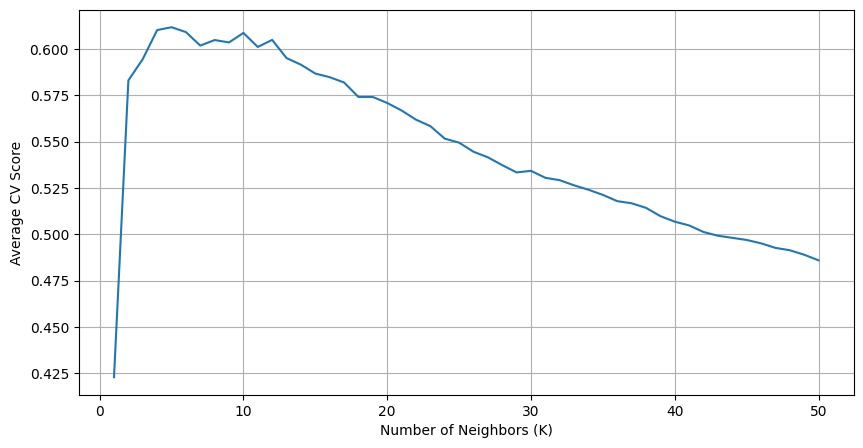

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Liste pour stocker les moyennes des scores
k_values = range(1, 51)
mean_scores = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    mean_scores.append(np.mean(cv_scores))

# Visualisation
plt.figure(figsize=(10, 5))
plt.plot(k_values, mean_scores)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Average CV Score')
plt.grid(True)



❓Can you guess what makes GridSearchCV a better option than such manual loop ?


<details>
    <summary>Answer</summary>

- Sklearn's `n_jobs=-1` allows you to parallelize the search, utilizing all of your CPU cores
- What if you had multiple hyper-parameters to co-optimize?
</details>

## 5. GridSearch with multiple parameters

👩🏻‍🏫 KNNRegressor suppports various _distance metrics_ via the hyper-parameter `p` 

📚 [sklearn.neighbors.KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

❓ **Question (tuning multiple parameters)** ❓


* Use GridSearchCV to search for the best $K$ and $p$ simultaneously.
    * Try all combinations for $K = [1, 5, 10, 20, 50]$ and $p = [1, 2, 3]$. 

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Instantiate model
model = KNeighborsRegressor()

# Hyperparameter Grid
param_grid = {
    'n_neighbors': [1, 5, 10, 20, 50],
    'p' : [1, 2, 3]
}

# Instantiate Grid Search
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1   # use all CPU cores
)

# Fit data to Grid Search
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50], 'p': [1, 2, 3]})

❓ **Question (number of submodels)**❓

How many submodels did you train overall?

<details>
    <summary>Hint</summary>

Much more than 15. Think twice :)
    <details>
    <summary>Answer</summary>

75 models due to CV=5
</details>

In [46]:
75

75

❓ **Question (best parameters and best score after tuning the model with multiple parameters)**❓

What are the *best parameters* and the *best score*?

In [51]:
Best_parameters = grid.best_params_['n_neighbors']
Best_parameters

10

In [53]:
Best_score = grid.best_score_
Best_score

0.7969255879201194

## 6. Random Search

Now let's see whether a RandomizedSearch can find a better combination with the same number of models being fitted.

❓ **Question (RandomizedSearchCV)** ❓

Use `RandomizedSearchCV` to
- Randomly sample $K$ from a uniform `scipy.stats.randint(1,50)` ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html)) distribution
- Sample $p$ from a list $[1,2,3]$
- Use the correct numbers of `n_iter` and `cv` to fit the exact same numbers of models as in your previous GridSearchCV.

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
import numpy as np
from scipy.stats import randint

# Instantiate model
model = KNeighborsRegressor()

# Hyperparameter Grid
grid = {'n_neighbors': randint(1,50), 'p' : [1, 2, 3]}

    

# Instantiate Grid Search
search = RandomizedSearchCV(
    model,
    grid,
    scoring='r2',
    n_iter=15,  # number of draws
    cv=5, n_jobs=-1
)

# Fit data to Grid Search
search.fit(X_train_scaled, y_train)
search.best_estimator_

KNeighborsRegressor(n_neighbors=6, p=1)

In [58]:
search.best_score_

0.7978787384801239

In [59]:
search.best_params_

{'n_neighbors': 6, 'p': 1}

## 7. Generalization

❓ **Question (finetuning your model one more time)**❓

- Refine your RandomsearchCV if you want
- Choose your best model

In [60]:


from sklearn.metrics import r2_score

best_model = search.best_estimator_   # RandomSearch best model
y_pred = best_model.predict(X_test_scaled)
test_score = r2_score(y_test, y_pred)
test_score


0.7849037111368564

Now try to display your `cv_results` as a `DataFrame`, this will help you visualize what's going on inside the CV! 😉

In [62]:
import pandas as pd

cv_df = pd.DataFrame(search.cv_results_)
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000877,0.000258,0.035270,0.004614,20,2,"{'n_neighbors': 20, 'p': 2}",0.735777,0.808371,0.708587,0.815256,0.728469,0.759292,0.043851,8
1,0.001055,0.000352,0.031102,0.021969,3,1,"{'n_neighbors': 3, 'p': 1}",0.671198,0.808213,0.758039,0.877403,0.836381,0.790247,0.071074,3
2,0.001656,0.001061,0.047518,0.005683,38,3,"{'n_neighbors': 38, 'p': 3}",0.702267,0.770675,0.651875,0.746227,0.661067,0.706422,0.046395,12
3,0.003186,0.002110,0.045420,0.009360,40,3,"{'n_neighbors': 40, 'p': 3}",0.703138,0.766186,0.645409,0.740804,0.658910,0.702890,0.046222,14
4,0.002004,0.001681,0.043232,0.006075,40,3,"{'n_neighbors': 40, 'p': 3}",0.703138,0.766186,0.645409,0.740804,0.658910,0.702890,0.046222,14
5,0.000996,0.000300,0.007882,0.001880,29,1,"{'n_neighbors': 29, 'p': 1}",0.765262,0.802169,0.716555,0.812515,0.748784,0.769057,0.035119,4
6,0.000591,0.000291,0.001473,0.000525,13,2,"{'n_neighbors': 13, 'p': 2}",0.728362,0.804034,0.722960,0.835764,0.723247,0.762873,0.047669,7
7,0.000716,0.000351,0.004118,0.000851,6,1,"{'n_neighbors': 6, 'p': 1}",0.719267,0.822341,0.768149,0.870533,0.809104,0.797879,0.051121,1
8,0.000711,0.000384,0.004470,0.000494,12,1,"{'n_neighbors': 12, 'p': 1}",0.761157,0.813126,0.732005,0.856813,0.790195,0.790659,0.042876,2
9,0.000652,0.000300,0.002019,0.000085,49,2,"{'n_neighbors': 49, 'p': 2}",0.730665,0.783625,0.681235,0.756862,0.687109,0.727899,0.039480,11


❓ **Question (Evaluation of the "best" model)** ❓

* Time has come to discover our model's performance with "best params" on the **unseen** test set `X_test`.
    * Compute the r2 score for the test set and save it as `r2_test`.

In [63]:
r2_test = test_score
r2_test


0.7849037111368564

❓ **Question (Taking a step back)** ❓

Would you consider the optimized model to generalize well?

<details><summary>Answer</summary>

Test score may decrease a bit with train set. Probably not more than 5%. This can be due to
- A non-representative train/test split
- A cross-val number too small leading to overfitting the model-tuning phase. The more you cross-validated, the more robust your findings will generalize - but you can't increase cv too much if your dataset is too small as you won't keep enough observations in each fold to be representative.
- Our dataset is very small and our hyperparameter optimization is thus extremely dependent (and overfitting) on our train/test split. Always make sure your dataset is much bigger than the total number of hyperparameter combinations you are trying out!
    
</details>

***🧪 Test your code***

In [64]:
from nbresult import ChallengeResult
result = ChallengeResult('r2', 
                         r2_test=r2_test)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/05-ML/05-Model-Tuning/data-workflow/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_r2.py::TestR2::test_r2 PASSED                                       [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/r2.pickle

git commit -m 'Completed r2 step'

git push origin master



🏁 Congratulations! Now, you know how to finetune a model using either a GridSearchCV or a RandomizedSearchCV 

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!